In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# deg,hrg_only,girg_only
single_data = pd.read_csv("diff.log")
# ./hyper -n 100000 -deg 100 -rseed 10 -step 0.5 > diff.log
# HRG base
# n 100000
# deg 100
# T 0
# alpha 0.75

# step 0.5
# threads 1
# rseed 10
# aseed 130

# generated HRG deg = 100.646 (5'032'323 edges)
# girg with degree 100.571 lacks 41998 HRG edges and has 38226 additional edges (5'028'551 edges)
# constant low 15.9922-16.0781 high 26.4219-26.5078 (deg 94.5-95, 154.5-155)

# n,hrg_deg,low,high,rep
scaling_data = pd.read_csv("diff_scaling.log")
# ./hyper_range -n1 4096 -n2 2097152 -deg 100 -rseed 12 -aseed 130 > diff_scaling.log 
# all given options are default params
# T = 0, deg = 100, 2**12 < n < 2**21, 50 reps

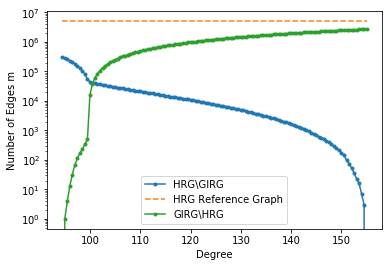

In [3]:
frame = single_data.groupby("deg")
fig, ax = plt.subplots(figsize=(6,4))

xs = frame["deg"].first()

ax.set_ylabel("Number of Edges m")
ax.set_xlabel("Degree")
ax.semilogy()

# ax.plot(xs, frame["girg_edges"].first(), label='total edges GIRG')

ax.plot(xs, frame["hrg_only"].first(), '.-', label='HRG\GIRG')
ax.plot(xs, [5028551]*len(xs), '--', label='HRG Reference Graph')
ax.plot(xs, frame["girg_only"].first(), '.-', label='GIRG\HRG')  

ax.legend()
    
plt.savefig("hrgisgirg_single.pdf", bbox_inches='tight')

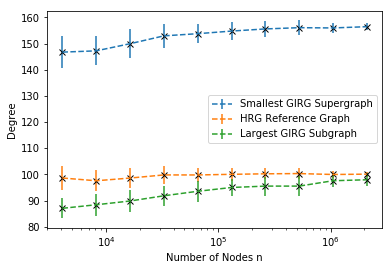

In [4]:
frame = scaling_data.groupby("n")
fig, ax = plt.subplots(figsize=(6,4))

ax.set_ylabel("Degree")
ax.set_xlabel("Number of Nodes n")
ax.semilogx()
names = {
    'high': 'Smallest GIRG Supergraph',
    'low': 'Largest GIRG Subgraph',
    'hrg_deg': 'HRG Reference Graph'
}

xs = frame["n"].first()
for key in ["high","hrg_deg","low"]:
    ys = frame[key].mean()
    yerr = frame[key].std()
    ax.plot(xs, ys, 'xk', label='')
    ax.errorbar(xs, ys, yerr, fmt='--', label=names[key])
    
ax.legend()

plt.savefig("hrgisgirg_range.pdf", bbox_inches='tight')